# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from wordcloud import WordCloud
from tensorflow.keras.layers import Dense,SpatialDropout1D,LSTM,Embedding,Flatten,Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.models import Sequential

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# IMPORT DATASET

In [2]:
data_fake=pd.read_csv("F:/PROJECT/Fake.csv")
data_true=pd.read_csv("F:/PROJECT/True.csv")

# EDA & PREPROCESSING

In [3]:

data_fake['class']=0
data_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [4]:
data_true['class']=1
data_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
    
    
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [6]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11736\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11736\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [7]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [8]:
data=data_merge.drop(['title','subject','date'],axis=1)

In [9]:
data=data.sample(frac=1)  #randomly picking data in 1D

In [10]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [11]:
def clean(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[-()\"#/@;:<>~|.?,!]","",text)
    text = re.sub('\n', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words = [w for w in tokens if not w in stop_words]
    return " ".join(words)

In [12]:
nltk.download('punkt')
data['text']=data['text'].apply(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Convert Text to Binary Format

In [13]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['text'])
print("tokenizer",tokenizer)
X = tokenizer.texts_to_sequences(data['text'])
print("X" '/n',X)

tokenizer <keras.preprocessing.text.Tokenizer object at 0x0000026EB2274730>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



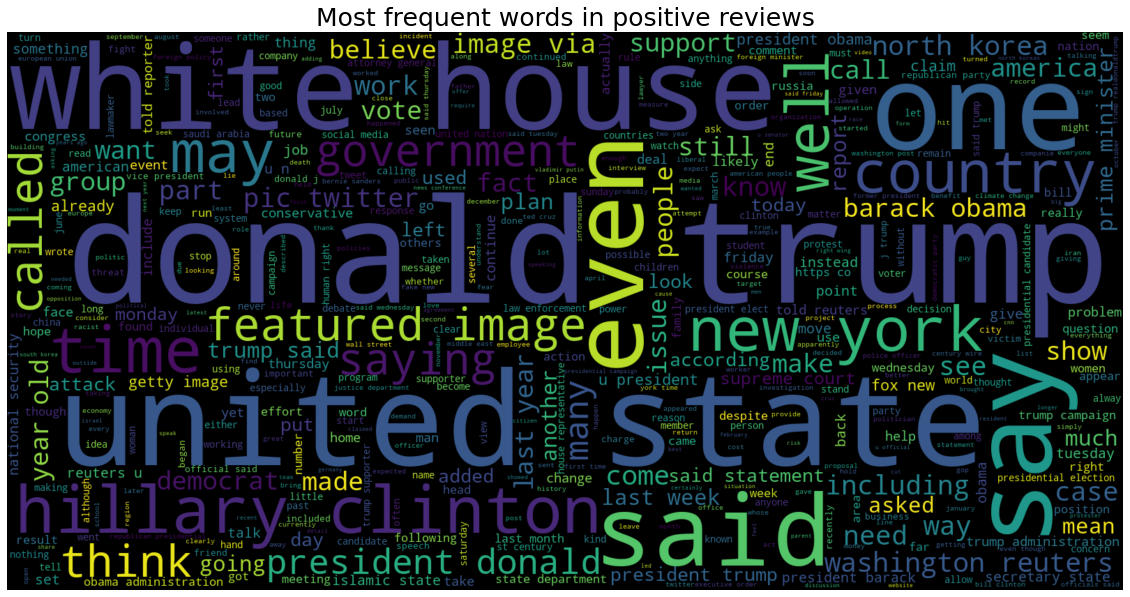

In [14]:
text=' '.join([word for word in data['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

In [15]:

maxlen = 45
vocab_size = len(tokenizer.word_index)+1
X = pad_sequences(X,padding='post',maxlen=maxlen)
X

array([[ 515, 1661,  579, ...,  473,  388,    2],
       [3405,   36,    1, ...,  689,  158,    4],
       [ 683, 3487, 3077, ...,  472,  997, 2573],
       ...,
       [  28, 2332,   42, ..., 1250,  178, 1584],
       [  18,  515,   77, ..., 3815,  436,  374],
       [ 608,  132,  150, ..., 2292, 1286,  316]])

# LSTM  MODEL BUILDING

#### Model Creation

In [16]:
y = data['class']
Y=y.values
Y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40,stratify=Y)

In [18]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10
MAX_sentense_len=45

In [19]:

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length= maxlen,name="embedding"))#embedding_size
model.add(SpatialDropout1D(0.4))
model.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 128)           14760448  
                                                                 
 spatial_dropout1d (SpatialD  (None, 45, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                        

#### Configuration Step

In [20]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Training Step

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1122/1122 [==============================] - 117s 96ms/step - loss: 0.6812 - accuracy: 0.5449 - val_loss: 0.6676 - val_accuracy: 0.5855
Epoch 2/10
1122/1122 [==============================] - 109s 97ms/step - loss: 0.6331 - accuracy: 0.7489 - val_loss: 0.5484 - val_accuracy: 0.8564
Epoch 3/10
1122/1122 [==============================] - 110s 98ms/step - loss: 0.3725 - accuracy: 0.8492 - val_loss: 0.3231 - val_accuracy: 0.8562
Epoch 4/10
1122/1122 [==============================] - 109s 98ms/step - loss: 0.2266 - accuracy: 0.9140 - val_loss: 0.1790 - val_accuracy: 0.9365
Epoch 5/10
1122/1122 [==============================] - 110s 98ms/step - loss: 0.1754 - accuracy: 0.9347 - val_loss: 0.1599 - val_accuracy: 0.9397
Epoch 6/10
1122/1122 [==============================] - 285s 254ms/step - loss: 0.1490 - accuracy: 0.9457 - val_loss: 0.1271 - val_accuracy: 0.9530
Epoch 7/10
1122/1122 [==============================] - 105s 94ms/step - loss: 0.1328 - accuracy: 0.9515 - val_loss: 

#### Evaluation Step

In [22]:
loss,acc =  model.evaluate(x_test,y_test,batch_size=32)
print('testing accuracy %.1f%%'%(100*acc))

281/281 [==============================] - 1s 5ms/step - loss: 0.0968 - accuracy: 0.9655
testing accuracy 96.5%


# Prediction

In [23]:
def preprocess(text):
    tokenizer = Tokenizer(num_words=5000, split=' ')
    tokenizer.fit_on_texts(text)
    X= tokenizer.texts_to_sequences(text)
    X= pad_sequences(X,padding='post',maxlen=maxlen)
    pred = model.predict(X)
    if pred >= 0.5 :
        print('This is a Positive response')
    else :
        print('This is a Negative Response')
        
    return pred
preprocess(['Many people have raised the alarm regarding the fact that Donald Trump is dangerously close to becoming an autocrat. The thing is, democracies become autocracies right under the people s noses, because they can often look like democracies in the beginning phases. This was explained by Republican David Frum just a couple of months into Donald Trump s presidency, in a piece in The Atlantic called  How to Build an Autocracy. In fact, if you really look critically at what is happening right now   the systematic discrediting of vital institutions such as the free press and the Federal Bureau of Investigation as well the direct weaponization of the Department of Justice in order to go after Trump s former political opponent, 2016 Democratic nominee Hillary Clinton, and you have the makings of an autocracy. We are more than well on our way. Further, one chamber of Congress, the House of Representatives, already has a rogue band of Republicans who are running a parallel investigation to the official Russian collusion investigation, with the explicit intent of undermining and discrediting the idea that Trump could have possibly done anything wrong with the Russians in order to swing the 2016 election in his favor.All of that is just for starters, too. Now, we have Trump making United Nations Ambassador Nikki Haley bully and threaten other countries in the United Nations who voted against Trump s decision to change U.S. policy when it comes to recognition of Jerusalem as the capital of the Jewish State. Well, one expert, who is usually quite measured, has had enough of Trump s autocratic antics: Former CIA Director John O. Brennan. The seasoned spy took to Trump s favorite platform, Twitter, and blasted the decision:Trump Admin threat to retaliate against nations that exercise sovereign right in UN to oppose US position on Jerusalem is beyond outrageous. Shows @realDonaldTrump expects blind loyalty and subservience from everyone qualities usually found in narcissistic, vengeful autocrats.  John O. Brennan (@JohnBrennan) December 21, 2017Director Brennan is correct, of course. Trump is behaving just like an autocrat, and so many people in the nation are asleep when it comes to this dangerous age, in which the greatest threat to democracy and the very fabric of the republic itself is the American president. Fellow Americans, we know the GOP-led Congress will not be the check on Trump that they are supposed to be. It s time to get out and flip the House and possibly the Senate in 2018, and resist in the meantime, if we want to save our country from devolving into something that looks more like Russia or North Korea than the America we have always know. We re already well on our way.Featured image via BRENDAN SMIALOWSKI/AFP/Getty Images'])

1/1 [==============================] - 0s 364ms/step
This is a Negative Response


array([[0.23492537]], dtype=float32)